In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load Titanic Dataset
df = pd.read_csv("Titanic Dataset.csv")

In [2]:
# Select Relevant Features
df = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex']]  # Numeric & categorical columns
df.dropna(inplace=True)  # Remove missing values

# Encode Categorical Variable
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Convert 'Sex' (Male=1, Female=0)

# Standardize Features for Better Clustering
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Apply K-Means Clustering (K=3 from Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

# Apply Hierarchical Clustering (Agglomerative, K=3)
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X)

Silhouette Score (K-Means): 0.3092
Silhouette Score (Hierarchical): 0.2589


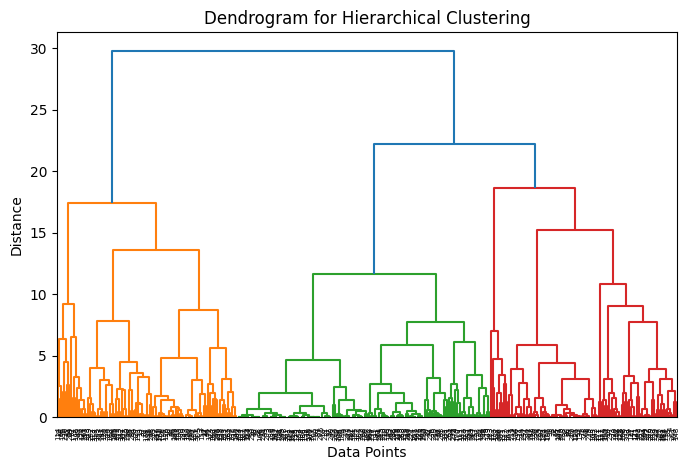

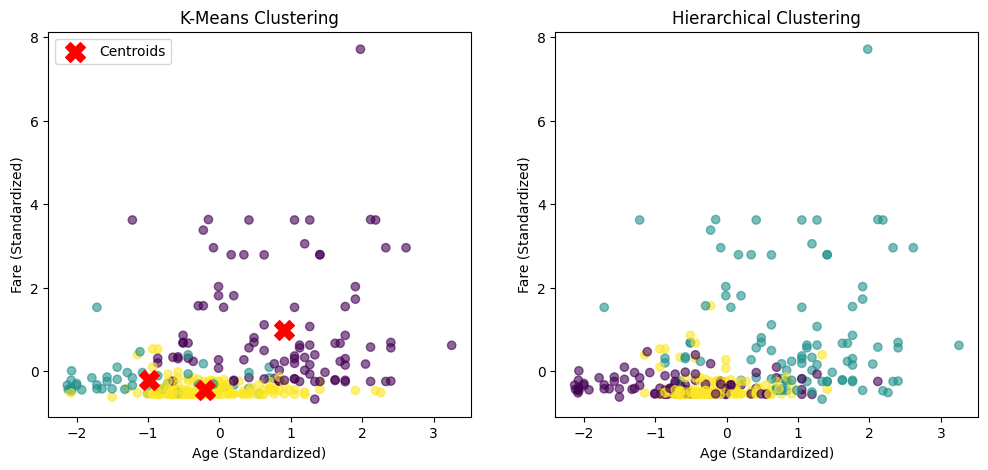

In [3]:
# Compute Silhouette Scores
silhouette_kmeans = silhouette_score(X, df['KMeans_Cluster'])
silhouette_hierarchical = silhouette_score(X, df['Hierarchical_Cluster'])

# Print Silhouette Scores
print(f"Silhouette Score (K-Means): {silhouette_kmeans:.4f}")
print(f"Silhouette Score (Hierarchical): {silhouette_hierarchical:.4f}")

# Visualize Dendrogram for Hierarchical Clustering
plt.figure(figsize=(8, 5))
dendrogram(linkage(X, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Scatter Plot of Clusters (K-Means vs. Hierarchical)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.6)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Age (Standardized)")
axes[0].set_ylabel("Fare (Standardized)")
axes[0].legend()

axes[1].scatter(X[:, 0], X[:, 1], c=df['Hierarchical_Cluster'], cmap='viridis', alpha=0.6)
axes[1].set_title("Hierarchical Clustering")
axes[1].set_xlabel("Age (Standardized)")
axes[1].set_ylabel("Fare (Standardized)")

plt.show()